# Download and Import Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammaddawood42/nvidia-stock-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\thari\.cache\kagglehub\datasets\muhammaddawood42\nvidia-stock-data\versions\1


In [2]:
import pandas as pd

dataset = pd.read_csv("data/NVIDIA_STOCK.csv")

In [3]:
dataset.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


In [4]:
dataset = dataset[2:]
dataset = dataset.rename(columns={'Price': 'Date'})

In [5]:
dataset.head()

,Date,Adj Close,Close,High,Low,Open,Volume
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
5,2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
6,2018-01-08,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


# EDA

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 2 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1697 non-null   object
 1   Adj Close  1697 non-null   object
 2   Close      1697 non-null   object
 3   High       1697 non-null   object
 4   Low        1697 non-null   object
 5   Open       1697 non-null   object
 6   Volume     1697 non-null   object
dtypes: object(7)
memory usage: 92.9+ KB


In [7]:
# change the data type of the Date column
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Adj Close'] = pd.to_numeric(dataset['Adj Close'])
dataset['Close'] = pd.to_numeric(dataset['Close'])
dataset['High'] = pd.to_numeric(dataset['High'])
dataset['Low'] = pd.to_numeric(dataset['Low'])
dataset['Open'] = pd.to_numeric(dataset['Open'])
dataset['Volume'] = pd.to_numeric(dataset['Volume'])

In [8]:
dataset.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03
mean,24.797593,24.828411,25.295239,24.315422,24.823341,4.716865e+08
std,29.221442,29.216014,29.811740,28.570804,29.240504,2.093254e+08
min,3.151430,3.177000,3.249500,3.111500,3.162250,9.788400e+07
25%,6.113620,6.161750,6.250000,6.064250,6.166250,3.278440e+08
50%,13.985092,14.015750,14.243500,13.750000,14.033750,4.349650e+08
75%,27.088902,27.104000,27.496000,26.613001,27.077999,5.708320e+08
max,135.559067,135.580002,140.759995,132.419998,139.800003,2.511528e+09


In [9]:
dataset.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [10]:
print("Close Min: ", dataset['Close'].min())
print("Close Max: ", dataset['Close'].max())

Close Min:  3.177000045776367
Close Max:  135.5800018310547


# Visualisation

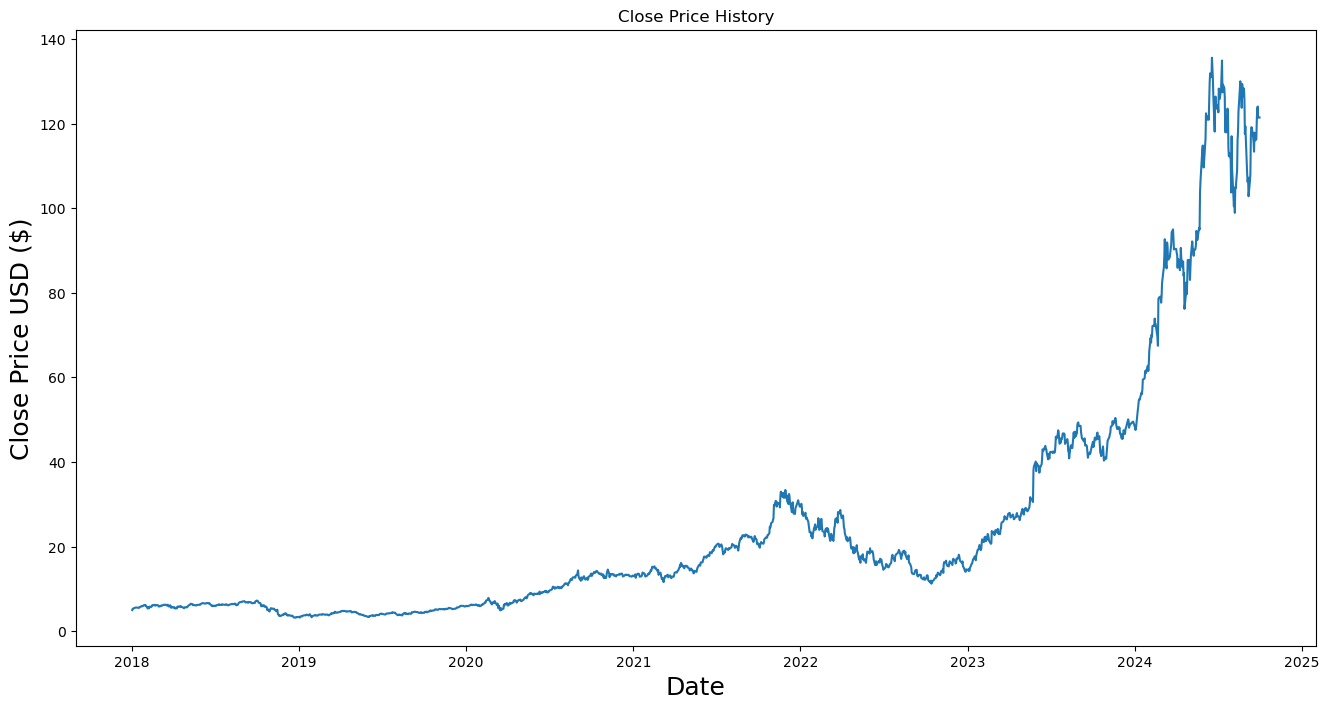

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

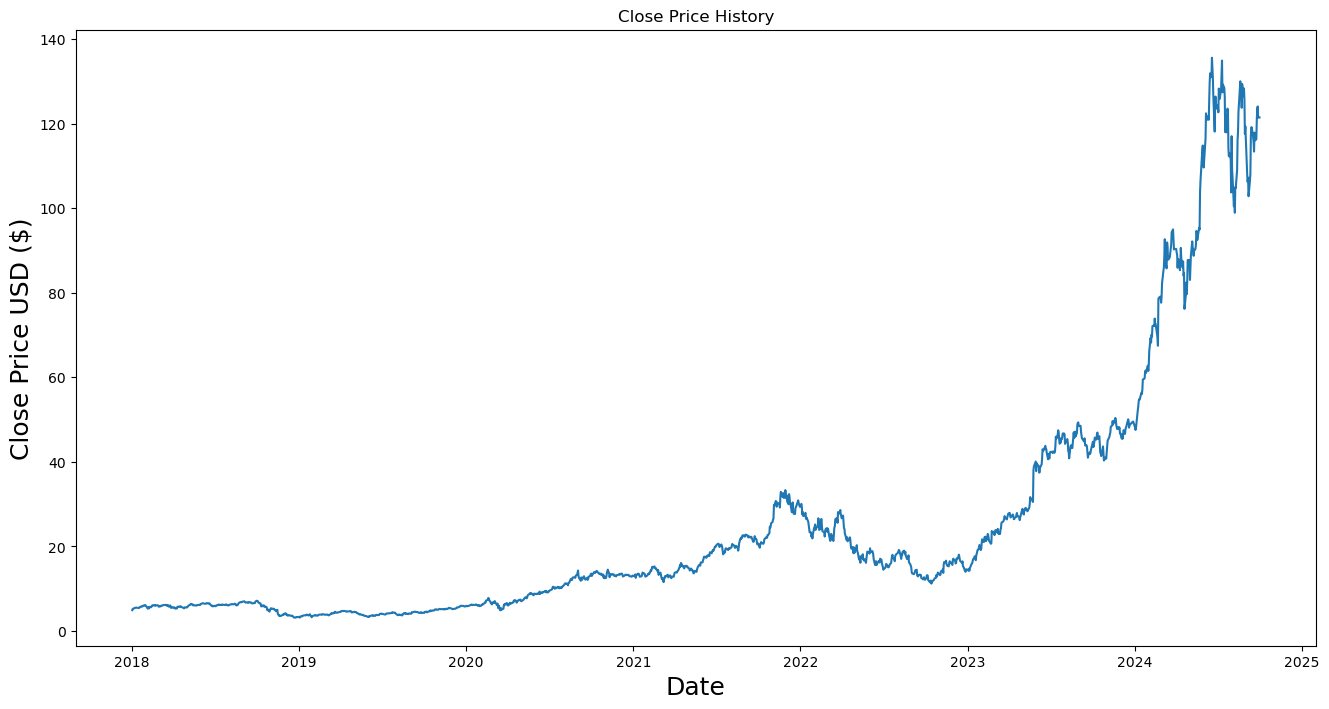

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

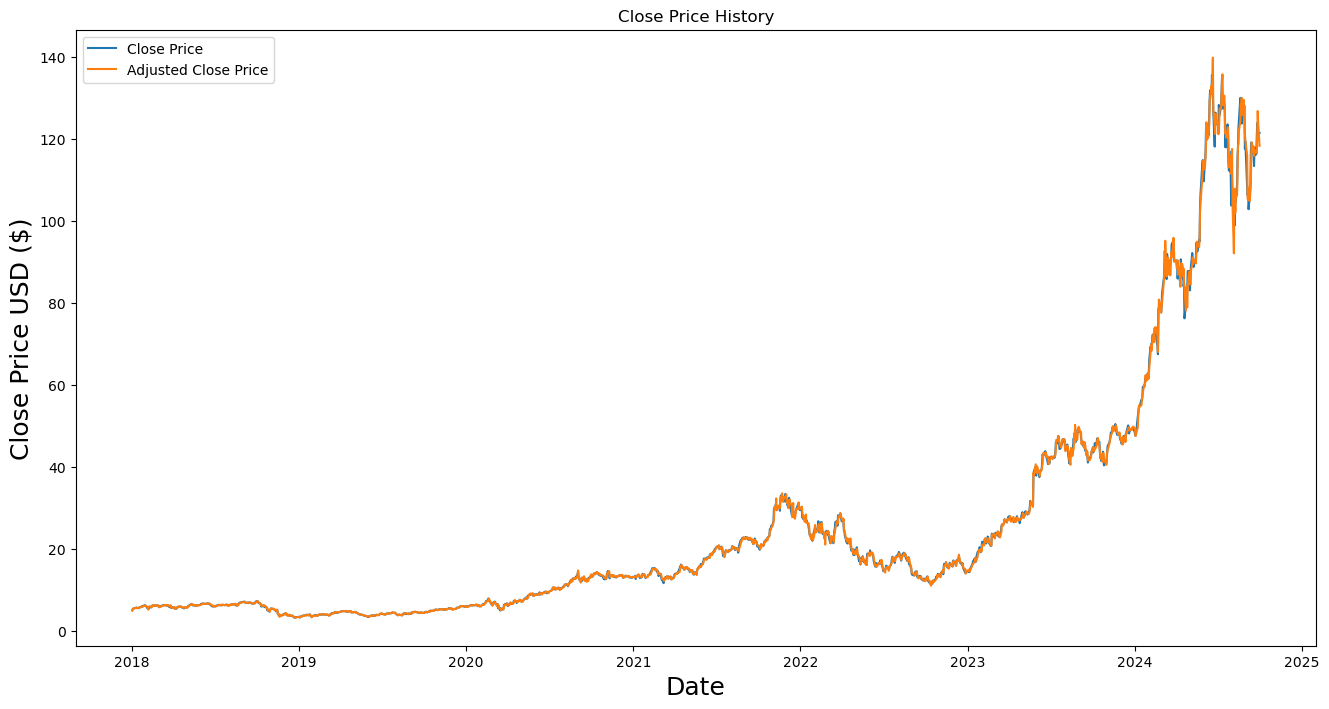

In [14]:
# compare the close price with the adjusted close price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(dataset['Date'], dataset['Close'], label='Close Price')
plt.plot(dataset['Date'], dataset['Open'], label='Adjusted Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()